# The numpy.random package

An exploratory  investigation in to the numpy random package. The documentation can be found on scipy [here](https://docs.scipy.org/doc/numpy-1.15.0/reference/routines.random.html)

## The overall purpose of the package

Random numbers have many uses. Marketing, psychology, clinical research and STEM disciplines, all use random numbers to some degree.  

Often, information about a specific population or groups is sought, such as people aged between 20 and 30 shopping habits.  These groups form a target population. Frequently the target population is too large, to costly to measure, if not impossible, so a sample is drawn from the target population. Sampling involves taking a subset of a given population and making generalisations about the general target population. It is vital therefore that the sample shares the same characteristics of its target population. Picking samples from a population is prone to biases. For example, if asked to pick a number at random between 1 and 10 there will be far more 3's and 7's than would be expected if the choice was truly random [ref](https://micro.magnet.fsu.edu/creatures/pages/random.html).  

One way to reduce this sampling bias is to use random sampling. Random sampling means that every item in the target population as an equal chance of being selected. In the example above, the target population would be the numbers between 1 and 10 and random sampling means that all numbers in this interval have an equal probability in being picked. The target population may follow a probability distribution.  


Sample data is used to infer something about its target population so it’s vital that sample should be representative of it as it will be used to make generalisations outside of the sample. For example, throwing a fair 6-sided dice has a population 1, 2, 3, 4, 5 and 6, each with the same chance of coming up whereas the heights of people would fall in a bell-shaped curve, most values lying within 3 standard deviations of the average height and very few people being exceptionally tall or exceptionally short.  

Computing algorithms are deterministic and cannot generate true randomness. Rather, pseudo random numbers are used (Idris, 2015). To all appearances these look random but if a key piece of information is known the whole random sequence can be predicted. This is not necessarily a bad thing. A statistical model may need the same randomness to test out other parameters. In cryptography however less, deterministic randomness would be appropriate. 

Python has an in-built random package. NumPy extends this by adding extra functionality. Both base their random generator on the Mersenne Twister algorithm [ref](https://en.wikipedia.org/ wiki/Mersenne_Twister). This is suitable to use in many areas that require random sampling [ref](https://stackoverflow.com/questions/7029993/differences-between-numpy-random-and-random-random-in-python). In order to generate a random sample, NumPy.random uses a 'seed' value in the Mersenne Twister. The random sequence propagates from this seed. For example, if the seed was 20 and the algorithm was every odd number in sequence after 20 then the generated (non random)sequence would be 21, 23, 25 etc. If no seed is specified then NumPy.random automatically selects random seed using either the computers random number generator or the current exact time on the systems clock (Vo. T.H et al., 2017).  

Numpy.random can be subdivided into 4 main routines. 

- simple random data
- permutations
- distributions
- random generator

Simple random data section consist of several functions that generate simple random data.Inputs can be size or range. Permutation functions randomly shuffle or permutes a given sequence. Distribution functions allow specific population distributions or ranges to be sampled. This may require statistical measures such as mean and standard deviation. Numpy.random can generate samples from continuous and descrite distributins (Idris, 2015). Lastly, the random generator section contains functions that allow seeds to be specified (Mehta, 2015). This is useful in cases where the exact same sequence of random data is required. Each of these sections will be explored.         


## The use of the 'Simple random data' and 'Permutations' function

- ### Simple Random Data

There are 10 simple random data functions in Numpy.random namely,rand, randn, randint, random_integers, random_sample, random, randf, sample, choice and bytes [ref](https://docs.scipy.org/doc/numpy-1.15.1/reference/routines.random.html). Of these random, ranf and sample [](https://stackoverflow.com/questions/18829185/difference-between-various-numpy-random-functions)are aliases of random_sample, with similar inputs and outputs.      

In [1]:
#Import packages numpy and matplotlib.pyplot
import numpy as np
import random
import matplotlib.pyplot as plt
# display pyplot in jupyter notebook
%matplotlib inline

Python has the built in random function for generating simple random data.

In [2]:
r1 = random.random()
print("Simple random data from python's inbuilt random function", '\n')
print(r1, '\n')
print("Simple random data from python's inbuilt random function uniformly distriubted between 0 and 1", '\n')
r2 = random.uniform(0,1)
print(r2)


Simple random data from python's inbuilt random function 

0.6320645979752799 

Simple random data from python's inbuilt random function uniformly distriubted between 0 and 1 

0.21553025823314953


numpy.random extends this, adding extra functions and methods. 


|Simple Random Data| Input                       | Output                                                           |
| -----------------|:------------------------    | :--------------------------------------------------------------- |
| rand             | d0, d1, …, dn               | Random values in a given shape                                   |               
| randn            | d0, d1, …, dn               | sample (or samples) from the “standard normal” distribution      |              
| randint          | low`[, high, size, dtype]`  | Return random integers from low (inclusive) to high (exclusive)  |            
| random_integers  | low`[, high, size])` 	     | Random integers of type np.int between low and high, inclusive.  |
| random_sample    | `[size]`                    | Random floats in the half-open interval `[0.0, 1.0)`             |               
| random           | `[size]`                    | Random floats in the half-open interval `[0.0, 1.0)`             |               
| ranf             | `[size]`                    | Random floats in the half-open interval `[0.0, 1.0)`             |               
| sample           | `[size]`                    | Random floats in the half-open interval `[0.0, 1.0)`             |               
| choice           | `a[, size, replace, p]`     | Generates a random sample from a given 1-D array                 |                     
| bytes            | length                      | Random bytes                                                     |      




### rand
rand(d0, d1, ..., dn) outputs random values in a given shape. Shape refers to the arrangment of the arrays. eg. a input of  (1)is a single 1x1 matrix array, an input of (2,3) is  a 2x3 matrix array (number of rows x columns) while an input of (2,3,4) is 2 arrays consisting each consisting of 3x4 matrix arrays. 
rand is a convenience or helper function. It creates random values in a given shape [ref](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.rand.html#numpy.random.rand). Inputs are non negative integers, although 0 returns an empty array.  If no input is given a single number is outputed. Output arrays come from the uniform distribution (i.e. each number has the same probability of being selected) between 0 inclusive and 1 exclusive `[0, 1)` 



In [3]:
# no input - output is a random number in the interval [0,1)
print ("no input - output is a random number in the interval [0,1)")
np.random.rand()


no input - output is a random number in the interval [0,1)


0.9321062320516366

In [4]:
# input is size 1, output is a random number in an array with 1 element from the interval [0, 1) 
np.random.rand(1)

array([ 0.91177475])

In [5]:
# input is size 5, output is 1 array containing 5 random numbers from the interval [0,1)
np.random.rand(5)

array([ 0.20071476,  0.33061766,  0.75046849,  0.94011395,  0.31289736])

In [6]:
# input has 3 size dimentions of 2, 3 and 4, output is 2 3x4 matrices filled with random numbers from the interval [0,1)
np.random.rand(2, 3, 4)

array([[[ 0.82228426,  0.50484518,  0.93871029,  0.53665961],
        [ 0.27495299,  0.24090321,  0.95281323,  0.08077317],
        [ 0.0676911 ,  0.76225234,  0.9795832 ,  0.75141347]],

       [[ 0.40337268,  0.75892379,  0.16884593,  0.7940586 ],
        [ 0.81379336,  0.40364997,  0.30443161,  0.75084011],
        [ 0.40232766,  0.85452308,  0.75875827,  0.48697227]]])

In [7]:
# input as 4 size dimentions of 2, 3, 4 and 5, output is 2 groups of 3 4x5 matrices filled with random numbers from the interval [0,1)
np.random.rand(2,3,4,5)

array([[[[  4.87596940e-01,   4.81308630e-02,   2.03986637e-01,
            1.42725999e-01,   9.64813416e-01],
         [  8.91925672e-01,   9.43202327e-01,   2.62384991e-01,
            3.41061921e-01,   6.04759611e-01],
         [  3.11996011e-01,   7.60526650e-01,   8.11004133e-01,
            3.89687214e-01,   4.65309235e-01],
         [  8.37811518e-01,   3.37651049e-01,   7.06296682e-01,
            5.63750826e-01,   4.35922839e-01]],

        [[  9.00093703e-02,   1.85263073e-01,   1.03629452e-01,
            7.94031625e-01,   8.87665866e-01],
         [  8.62752756e-01,   5.08113448e-01,   9.66095801e-01,
            8.96405148e-01,   4.20436664e-01],
         [  1.07889993e-01,   1.07050061e-01,   4.51280149e-04,
            2.19780202e-01,   7.87310700e-01],
         [  4.02179936e-01,   5.14166674e-01,   9.27424572e-01,
            5.27473957e-02,   1.60843359e-01]],

        [[  7.12652567e-02,   2.13434832e-01,   5.20887071e-01,
            9.43084842e-01,   9.12985968e-01

### randn

randn((d0, d1, ..., dn) outputs a sample(s) from the “standard normal” distribution N(0,1).
Randn is similar to rand but takes its random numbers from the standard normal distrubution with mean 0 and standard deviation 1 N(0,1)[ref](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.randn.html#numpy.random.randn). It is similar to the standard_normal distrubution in NumPy.random however standard_normal can have tuples as arguments. Randn's arguements must be positive integers or integer like (such as int(1.02)). Like rand, it is a convenience function with inputs for sizes. If no input given a single random number (float) from the standard normal distribution is outputted. Outputs take the form of n dimentional arrays in the shape specifed by the inputs. If a non standard normal distribution N(m,sd<sup>2</sup>) is required, the transformation m + sd * np.random.rand() can be applied. 

In [8]:
# no input given  - single random float returned
np.random.randn()


-1.0081828193506883

note that this number can be negative with the majority of the datapoints normally distributed within `[-3,3]`


In [9]:
# 1 input given  - single random array from N(0,1)
print(np.random.randn(1),'\n')

# outputs a 1x1 array of 5 random floats from N(0,1)
print(np.random.randn(5),'\n')

# outputs 2 arrays of 3x4 matrices filled with random numbers from N(0,1)
print(np.random.randn(2,3,4),'\n')

# outputs a 2x3 matrix with filled with random numbers from N(2, 9)
2+3*np.random.randn(2,3)

[ 0.43746675] 

[ 0.38983544 -0.45451595  0.3489156  -0.75194013 -1.15765189] 

[[[-1.05405115  1.19974172 -2.15433082  0.74761489]
  [ 0.32550447 -0.03099798 -1.04219645  0.06380564]
  [ 0.63745884  0.34999261 -0.70933295  1.39911282]]

 [[-0.91287309 -0.31359325  1.71864184 -0.13402234]
  [ 0.19411721  0.12630762  1.07844811 -1.22200246]
  [-1.4238669   0.79096815 -1.33062993  0.15086461]]] 



array([[ 1.13954585,  4.16734444,  5.31440253],
       [ 3.1520487 ,  2.80574659, -3.57026828]])

### randint

randint((low`[, high, size, dtype]`))outputs random integers from low (inclusive) to high (exclusive). 
randint is differs from the two above functions in that it returns integers within a specifeid interval low (inclusive) to high (exclusive). Integers are returned from the discrete uniform distribution [ref](). Whereas rand returned numbers from the continous uniform distribution between `[0,1)`. Randint expands this interval by returing values from `[low,high)`. If no arguments are given an error is returned. If one argument is given, say h then this is assumed to be the higher bound and the lower bound is one less `[h-1, h)`.  Size can also be specified e.g. if 10 random numbers are required between `[0, 5)` the arguments would be (0,5,10). Data type can also be specified, the default is np.int. dTypes relate to the way memory blocks are interpreted [ref](https://stackoverflow.com/questions/9457037/what-does-dtype-do).    

In [10]:
# returns an error - uncomment the line below to veiw the error
# print(np.random.randint(), '\n')
# gives a 'random' integer between 0 inclusive and 1 exclusive (there is only one integer in this interval, 0) 
print(np.random.randint(1), '\n')

# gives a random integer between [-1, 3)
print(np.random.randint(-1, 3), '\n')

# Size can be specified by the third argument
print(np.random.randint(0, 5, 10), '\n')

# Datatype can also be specified 
print(np.random.randint(0, 5, 10, dtype="int32"), '\n')


0 

-1 

[3 2 4 4 4 4 1 3 3 3] 

[4 4 3 1 1 0 0 4 1 2] 



### random_integers

random_integers(low`[, high, size]`) outputs random integers of type np.int between low and high, inclusive. Size refers to the number of random values required from the specified interval. This function is no longer maintained. 

Random_integers is very similar to randint, both return integers from a discrete uniform distribution. However random_integers is inclusive of the higher range value `[low, high]`. This function is deprecated i.e replaced, in favour of randint. Thus when called by python a warning will display, although the function will still work. Both randint and random_integers can use the transformation  a + (b - a) * (np.random.random_integers(N) - 1) / (N - 1) to give N evenly spaced integers between a and b but random_integers includes the b value whereas randind does not. 



In [11]:
# This will output 1's or 0's randomly
print(np.random.random_integers(0,1), '\n')


a,b,N=3,5,10
print(a + (b - a) * (np.random.random_integers(N) - 1) / (N - 1), '\n')
print(a + (b - a) * (np.random.randint(N) - 1) / (N - 1))

1 

4.55555555556 

2.7777777777777777


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: This function is deprecated. Please call randint(1, 10 + 1) instead
  


### random_sample (random, ranf and sample)

random_sample(`[size]`) outputs random floats in the half-open interval `[0.0, 1.0)` [ref](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.random_sample.html#numpy.random.random_sample).
Random_sample and its aliases [ref](https://stackoverflow.com/questions/18829185/difference-between-various-numpy-random-functions) random [ref](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.random.html#numpy.random.random), ranf [ref](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.ranf.html#numpy.random.ranf) and sample [ref](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.sample.html#numpy.random.sample) . unlike randint which returned random values from the descrite uniform distribution `[low, high)` and rand which populates arrays with random values in a given shape, random_sample returns random floats from the continous uniform distrubtion `[0,1)`. It's input is size i.e. the number of random values required. To expand values outside of U`[0,1)` to cover U`[a, b)` the transformation a +  (b - a)`*` random_sample() can be used. the size can be an integer or tuples of integers (a,b,c) 


0.6724540252713286 



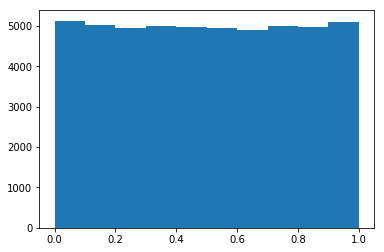

[[[ 0.6667682   0.18411566  0.7600815   0.12873209]
  [ 0.90274035  0.37175426  0.57677388  0.76549682]
  [ 0.43391157  0.96730333  0.95613948  0.63103894]]

 [[ 0.23282996  0.52629126  0.8214739   0.55131823]
  [ 0.69519841  0.21575555  0.53361072  0.39532853]
  [ 0.11342478  0.83416613  0.06453712  0.86743808]]] 

[ 2.99252239  2.93729443  2.88345061  2.90744878  2.90599442  2.84710403
  2.9348486   2.94757066  2.86773221  2.9997044 ] 

[ 2.85785633  2.80166953  2.79248394  2.91290157  2.99475984  2.92535024
  2.97281738  2.84609166  2.77833629  2.91781995] 

[ 2.8504653   2.83666095  2.80242074  2.97744565  2.86254514  2.82423805
  2.80423751  2.90584428  2.88948618  2.94974705] 

[ 2.91208612  2.8305418   2.80633047  2.86649132  2.95572723  2.97910054
  2.90839299  2.86676629  2.99693362  2.89950183] 



In [12]:
# when no arguments are given a single random float between [0,1) is given
print(np.random.random_sample(), '\n')

# when size is 50000, an array with 50000 random floats between [0,1) is given
x =np.random.random_sample(50000)

# This shows the continous uniform distribution over {0,1)
plt.hist(x)
plt.show()

# arguments can be tuples
print(np.random.random_sample((2,3,4)), '\n')

# To change the interval U[0, 1) from which the numbers are selected from use the transformation a + (b - a)* random_sample() in U[a,b)
# This outputs 10 random floats between [3, 5)}
a,b,N=3,5,10
print(a + (b - a) * (np.random.random_sample(N) - 1) / (N - 1), '\n')
print(a + (b - a) * (np.random.random(N) - 1) / (N - 1), '\n')
print(a + (b - a) * (np.random.ranf(N) - 1) / (N - 1), '\n')
print(a + (b - a) * (np.random.sample(N) - 1) / (N - 1), '\n')

seems to generate one point at 0.5

### choice

choice(a`[, size, replace, p]`) outputs a random sample from a given 1-D array [ref](https://docs.scipy.org/doc/numpy-1.15.1/reference/routines.random.html). its input is a 1 dimentional array or integer. The number of random values required can be specified by size. The difference between this function and the ones above is that here the population is specified in an array and the function returns one of these choices randomly. e.g. an input of all the harry potter book titles would randomly return one book from this population. The probability p of elements in the 1 d array can be specified (probabilities total to 1). If p is not provided then p is assumed to be uniformly distruibuted across the array. Size refers to the number of random elements from the population that are returned. There is also the option to replace which defaults to true. This refers to whether or not the random choice element is returned to the sample population and is used when unique values from the population are needed [ref](https://stackoverflow.com/questions/40689152/what-does-replacement-mean-in-numpy-random-choice). 



seems to generate 10 datapoints 3 between 0.1 and 0.2, 2 between 03 and 0.4 and 0.7 and 0.8 and 1 in each of 0.5 and 0.6 intervals.

In [13]:
hp = ['Harry Potter and the Philosopher’s Stone', 'Harry Potter and the Chamber of Secrets', 'Harry Potter and the Prisoner of Azkaban', 'Harry Potter and the Goblet of Fire', 'Harry Potter and the Order of the Phoenix', 'Harry Potter and the Half-Blood Prince', 'Harry Potter and the Deathly Hallows']
print(np.random.choice(hp, 6, replace=False), '\n')# only unique books are returned
print(np.random.choice(hp, 6), '\n')#  books can be repeatedly returned
print(np.random.choice(hp, 6, p=[0.2,0.5,0.1,0.1,0.015,0.03,0.055], replace=True), '\n')# Chamber of secrets more likely to be selected 


['Harry Potter and the Order of the Phoenix'
 'Harry Potter and the Philosopher’s Stone'
 'Harry Potter and the Half-Blood Prince'
 'Harry Potter and the Chamber of Secrets'
 'Harry Potter and the Prisoner of Azkaban'
 'Harry Potter and the Goblet of Fire'] 

['Harry Potter and the Order of the Phoenix'
 'Harry Potter and the Order of the Phoenix'
 'Harry Potter and the Half-Blood Prince'
 'Harry Potter and the Goblet of Fire'
 'Harry Potter and the Prisoner of Azkaban'
 'Harry Potter and the Prisoner of Azkaban'] 

['Harry Potter and the Chamber of Secrets'
 'Harry Potter and the Chamber of Secrets'
 'Harry Potter and the Chamber of Secrets'
 'Harry Potter and the Chamber of Secrets'
 'Harry Potter and the Philosopher’s Stone'
 'Harry Potter and the Philosopher’s Stone'] 



### Bytes

bytes(length)outputs random bytes of the specified length size [Ref](https://docs.scipy.org/doc/numpy-1.15.1/reference/routines.random.html). 

bytes takes non negative integer inputs and outputs randomly byte strings. outputs are prefixed with b and the bytes are enclosed within apostrophies or quotation marks, hence outputs are strings of specified length [Ref](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.bytes.html#numpy.random.bytes). The b at the start indicates that it is a byte literal [why the b at the front](https://stackoverflow.com/questions/6269765/what-does-the-b-character-do-in-front-of-a-string-literal)



In [14]:
print(np.random.bytes(0),'\n')
print(np.random.bytes(1),'\n')
print(np.random.bytes(10),'\n')

b'' 

b'\x1f' 

b'z\xd4\xab\x1f\x0f\xa3X\x8c?\x95' 



Hence Simple Random Data contains functions for generating random elements consisting of integers, arrays, sizes and shapes from continous or discrete uniform populations or normally distributed populations that may or may not be probabilistically weighted towards some values depending on what is required. It also contains functions to randomly pick elements from a given population array such as a list or set of bytes. The next section of numpy.random to be discussed is its permutation functions. 


## Permutations
A permutation is a way of cycling through all options in a given set. For example chosing unique pairs of 3 numbers (1,2 and 3)would give 3<sup>2</sup> combinations namely (1,1)(1,2)(1,3)(2,1)(2,2)(2,3)(3,1) (3,2) (3,3). Numpy.random has two permutation functions namely [Ref](https://docs.scipy.org/doc/numpy-1.15.1/reference/routines.random.html), 
- shuffle
- permutation

### shuffle
shuffle(x) takes an array or array like input and randomly reorders elements in the array. E.g. randomly shuffling the order of harry potter books


In [15]:
hp = ['Harry Potter and the Philosopher’s Stone', 'Harry Potter and the Chamber of Secrets', 'Harry Potter and the Prisoner of Azkaban', 'Harry Potter and the Goblet of Fire', 'Harry Potter and the Order of the Phoenix', 'Harry Potter and the Half-Blood Prince', 'Harry Potter and the Deathly Hallows']
for book in hp:
    print(book)
# shuffle the books
np.random.shuffle(hp)
hp


Harry Potter and the Philosopher’s Stone
Harry Potter and the Chamber of Secrets
Harry Potter and the Prisoner of Azkaban
Harry Potter and the Goblet of Fire
Harry Potter and the Order of the Phoenix
Harry Potter and the Half-Blood Prince
Harry Potter and the Deathly Hallows


['Harry Potter and the Half-Blood Prince',
 'Harry Potter and the Deathly Hallows',
 'Harry Potter and the Philosopher’s Stone',
 'Harry Potter and the Chamber of Secrets',
 'Harry Potter and the Goblet of Fire',
 'Harry Potter and the Prisoner of Azkaban',
 'Harry Potter and the Order of the Phoenix']

### Permutation

permutation(x) has an array as an input and randomly permutates the 

Randomly permute a sequence, or return a permuted range [Ref](https://docs.scipy.org/doc/numpy-1.15.1/reference/routines.random.html). Unlike shuffle which reorders the original array, permutation takes a copy of the original array and shuffles the copy. The original array remains intact. In addition permutation can take integer inputs and will output a range e.g an input of 5 will output a random range populated with unique elements from 0 to 4 inclusive. [Ref](https://stackoverflow.com/questions/15474159/shuffle-vs-permute-numpy)



In [16]:
# Books listed in order of publication date
hp = ['Harry Potter and the Philosopher’s Stone', 'Harry Potter and the Chamber of Secrets', 'Harry Potter and the Prisoner of Azkaban', 'Harry Potter and the Goblet of Fire', 'Harry Potter and the Order of the Phoenix', 'Harry Potter and the Half-Blood Prince', 'Harry Potter and the Deathly Hallows']
for book in hp:
    print(book)
print('\n')
# Books randomly permutated
print(np.random.permutation(hp))
# original book order is preserved unlike shuffle function
hp
print('\n')
# input is an integer output is a range
print(np.random.permutation(5), '\n')



Harry Potter and the Philosopher’s Stone
Harry Potter and the Chamber of Secrets
Harry Potter and the Prisoner of Azkaban
Harry Potter and the Goblet of Fire
Harry Potter and the Order of the Phoenix
Harry Potter and the Half-Blood Prince
Harry Potter and the Deathly Hallows


['Harry Potter and the Goblet of Fire'
 'Harry Potter and the Philosopher’s Stone'
 'Harry Potter and the Chamber of Secrets'
 'Harry Potter and the Half-Blood Prince'
 'Harry Potter and the Deathly Hallows'
 'Harry Potter and the Prisoner of Azkaban'
 'Harry Potter and the Order of the Phoenix']


[4 3 2 0 1] 



## The use and purpose of at least five 'distributions' functions

- ### Uniform

- ### Normal

- ### Binomial

- ### Possion

 - ### Power

##  The use of seeds in generating pseudorandom numbers

## Random generator

Random numbers are difficult to generate. Typically when true random numbers are requied some random natural process is used such as radioactive decay levels. Computational random number generation is not truely random. Algorithms can produce long sequences of random looking data but which in reality are completely deterministic once a key value or a seed is known [](https://en.wikipedia.org/wiki/Random_number_generation#%22True%22_vs._pseudo-random_numbers). 

Numpy.random contains four functions involved with the generation of random data from a specified range or given population, RandomState, Seen, get_state and set_state. As noted before 'random' in this sence means pseudo random. Numpy.random uses the pseudo random number generator (PSNG) algorithm named the 'Mersenne Twister'. This is a widely used computer algorithm that is suitable for most random number generaton needs. A PSNG requires a seed as a starting point in the random  sequence. Once a seed is defined, the random sequence it generates can be predicted [](Vo. T.H et al., 2017). If no seed is given then Numpy picks a 'random' one based on either the computers internal clock settings or on the computers own random number generator [](Vo. T.H et al., 2017). 

- RandomState
- Seed
- get_state
- set_state

Simple random data function and and random distrubution functions use the same universal random seed. If you want a different seed for one particular random pattern then you can specify the unique seed with the RandomState function. This creates a local random number gererator that differs from the global one used by the other functions [](McKinny, 2018). 

Numpy.random has a function seed that allows the user to specify the seed and therefore generate a predictible random pattern of data. This is required when testing statistical models that require the same 'random noise' so as not to affect the statistical parameters. 

get_state and set_state are ways of setting a specific random state (set_state) and recalling (get_state)for specific use [](https://stackoverflow.com/questions/48504854/python-random-getstate-and-random-setstate). 

Each of these four functions will be discussed below. 


### RandomState
RandomState(`[seed]`) takes the seed value for the Mersenne Twister as input and outputs the container for the Mersenne Twister pseudo-random number generator [](https://docs.scipy.org/doc/numpy-1.15.1/reference/routines.random.html).

This means that rather than changing global seed for the Mersenne Twister, a container or instance is created with that specific seed. It is used prior to calling other numpy.random functions. RandomState, like the seed function, allows for functions that call and create random data to return the same random data when called again. RandomState comes with a wide varity of methods to call various probability distrubtions and simple random data function. 

Generally RandomState is prefered over seed as if seed is used all instances of random numbers called within the session will be affected but in RandomState only the instance where it is used with the random method is affected. One thing that I'm not sure off is why RandomState shows different values when called agrepeatedly run but subesquent runs s 



Container for the Mersenne Twister pseudo-random number generator.

RandomState exposes a number of methods for generating random numbers drawn from a variety of probability distributions. In addition to the distribution-specific arguments, each method takes a keyword argument size that defaults to None. If size is None, then a single value is generated and returned. If size is an integer, then a 1-D array filled with generated values is returned. If size is a tuple, then an array with that shape is filled and returned.

Compatibility Guarantee A fixed seed and a fixed series of calls to ‘RandomState’ methods using the same parameters will always produce the same results up to roundoff error except when the values were incorrect. Incorrect values will be fixed and the NumPy version in which the fix was made will be noted in the relevant docstring. Extension of existing parameter ranges and the addition of new parameters is allowed as long the previous behavior remains unchanged.
Parameters:	

seed : {None, int, array_like}, optional

    Random seed used to initialize the pseudo-random number generator. Can be any integer between 0 and 2**32 - 1 inclusive, an array (or other sequence) of such integers, or None (the default). If seed is None, then RandomState will try to read data from /dev/urandom (or the Windows analogue) if available or seed from the clock otherwise.


https://stackoverflow.com/questions/5836335/consistently-create-same-random-numpy-array

https://stackoverflow.com/questions/32462273/how-to-use-random-randomstate

How does randomstate differ from seed? seed uses the functions of numpy.random i.e. the simple random data, permutation and distribution functions mentioned above, whereas RandomSeed uses a wide varitey of methods that are similar to numpy.random's global functions but local to just the RandomState function. 




In [136]:
# generate a random number with seed 5
seed = 5
np.random.seed(seed)
print(np.random.rand())
# output is always 0.22199317108973948

#This uses the global rand function and the seed affects all random functions within numpy.random for example 

print(np.random.randint(10)) # picks a random integer between [0, 10) - its always 6 with a seed of 5 a different simple random function than the one rand used above
# This will always be 6 when the seed is 5


#another way to achive the same result without affecting other the randomness of other numpy functions is to use RandomState
# set the state
rs = np.random.RandomState(seed)
# call the method
print(rs.rand())
# This will be 0.8928601514360016 
# however the other global function will not be affected by the RandomState's seed value and will remain at the previously 5 seeded value of 6
print(np.random.randint(10))
#reset random seed

# when the above code is run but the seed value is changed

# generate a random number with seed 5
seed = 50
np.random.seed(seed)
print(np.random.rand())
# output is always 0.22199317108973948

#This uses the global rand function and the seed affects all random functions within numpy.random for example 

print(np.random.randint(10)) # picks a random integer between [0, 10) - its always 6 with a seed of 5 a different simple random function than the one rand used above
# This will always be 6 when the seed is 5


#another way to achive the same result without affecting other the randomness of other numpy functions is to use RandomState
# set the state
rs = np.random.RandomState(seed)
# call the method
print(rs.rand())
# This will be 0.8928601514360016 
# however the other global function will not be affected by the RandomState's seed value and will remain at the previously 5 seeded value of 6
print(np.random.randint(10))
#reset random seed

# this shows that the local call to RandomState's methods same (0.49460164553802144) but the global numpy.random functions have different seeds and hence differnt random values 

# This allows you to have many instances of randomly generated numbers with differnt seeds within the same instance of python running


## still not 100 pc sure whats going on with the numbers

# https://stackoverflow.com/questions/32462273/how-to-use-random-randomstate


NameError: name 'get_state' is not defined

In [88]:
# Create the random state rn with seed 10 
# example adapted from https://www.machinelearningplus.com/python/numpy-tutorial-part1-array-python-examples/
print(np.random.RandomState(None))

print(np.random.RandomState())

print(np.random.RandomState(100))




rn = np.random.RandomState(10)

# Create 20 random numbers between [0,1) with the rand simple random data function
print(rn.rand(20), '\n')
print(rn.rand(20), '\n')
print(rn.rand(20), '\n')
print(rn.rand(20), '\n')
print(rn.rand(20), '\n')

[ 0.77132064  0.02075195  0.63364823  0.74880388  0.49850701  0.22479665
  0.19806286  0.76053071  0.16911084  0.08833981  0.68535982  0.95339335
  0.00394827  0.51219226  0.81262096  0.61252607  0.72175532  0.29187607
  0.91777412  0.71457578] 

[ 0.54254437  0.14217005  0.37334076  0.67413362  0.44183317  0.43401399
  0.61776698  0.51313824  0.65039718  0.60103895  0.8052232   0.52164715
  0.90864888  0.31923609  0.09045935  0.30070006  0.11398436  0.82868133
  0.04689632  0.62628715] 

[ 0.54758616  0.819287    0.19894754  0.8568503   0.35165264  0.75464769
  0.29596171  0.88393648  0.32551164  0.1650159   0.39252924  0.09346037
  0.82110566  0.15115202  0.38411445  0.94426071  0.98762547  0.45630455
  0.82612284  0.25137413] 

[ 0.59737165  0.90283176  0.53455795  0.59020136  0.03928177  0.35718176
  0.07961309  0.30545992  0.33071931  0.7738303   0.03995921  0.42949218
  0.31492687  0.63649114  0.34634715  0.04309736  0.87991517  0.76324059
  0.87809664  0.41750914] 

[ 0.60557756

In the above example, the random numbers generated were the same each time as the state was created locally before the simple random data function was called. If the RandomState is not set each time, numpy.random will default back to the global instance and use a random seed. 

In [39]:
# Create the random state rn with seed 10 
# example adapted from https://www.machinelearningplus.com/python/numpy-tutorial-part1-array-python-examples/

seed = 10
rn = np.random.RandomState() # this array has a RandomState created
print(rn)

rn.get_state


# Create 20 random numbers between [0,1) with the rand simple random data function
#print(rn.rand(20), '\n') # This array has a random
# The numbers will be the same each time once rn's RandomState is created each time
#create the random state
#print(rn.rand(20), '\n')
#create the random state
#print(rn.rand(5), '\n')

NameError: name 'get_state' is not defined

Container for the Mersenne Twister pseudo-random number generator.

RandomState exposes a number of methods for generating random numbers drawn from a variety of probability distributions. In addition to the distribution-specific arguments, each method takes a keyword argument size that defaults to None. If size is None, then a single value is generated and returned. If size is an integer, then a 1-D array filled with generated values is returned. If size is a tuple, then an array with that shape is filled and returned.

Compatibility Guarantee A fixed seed and a fixed series of calls to ‘RandomState’ methods using the same parameters will always produce the same results up to roundoff error except when the values were incorrect. Incorrect values will be fixed and the NumPy version in which the fix was made will be noted in the relevant docstring. Extension of existing parameter ranges and the addition of new parameters is allowed as long the previous behavior remains unchanged.
Parameters:	

seed : {None, int, array_like}, optional

    Random seed used to initialize the pseudo-random number generator. Can be any integer between 0 and 2**32 - 1 inclusive, an array (or other sequence) of such integers, or None (the default). If seed is None, then RandomState will try to read data from /dev/urandom (or the Windows analogue) if available or seed from the clock otherwise.

Notes

The Python stdlib module “random” also contains a Mersenne Twister pseudo-random number generator with a number of methods that are similar to the ones available in RandomState. RandomState, besides being NumPy-aware, has the advantage that it provides a much larger number of probability distributions to choose from. 



if RandomState is not used then any random numbers generate may differ the next time they are called as they are been seeded from a difference instance of RandomState

If you use the functions in the numpy.random namespace, you will not get consistent pseudorandom numbers because they are pulling from a different RandomState instance than the one you just created.




Random generator
RandomState([seed]) 	Container for the Mersenne Twister pseudo-random number generator.
seed([seed]) 	Seed the generator.
get_state() 	Return a tuple representing the internal state of the generator.
set_state(state) 	Set the internal state of the generator from a tuple.


# Reference

Idris, I. (2015). NumPy: Beginner's Guide - Third Edition. 3rd ed. BIRMINGHAM - MUMBAI: Packt Publishing. 

McKinney, W. (2018). Python for data analysis. Beijing [i 4 pozostałe]: O'Reilly.

Docs.scipy.org. (2018). Random sampling (numpy.random) — NumPy v1.15 Manual. [online] Available at: https://docs.scipy.org/doc/numpy-1.15.1/reference/routines.random.html [Accessed 20 Oct. 2018].

Vo. T.H, P., Czygan, M., Kumar, A. and Raman, K. (2017). Python. Birmingham: Packt Publishing.

McLeod, S. (2018). Sampling Methods | Simply Psychology. [online] Simplypsychology.org. Available at: https://www.simplypsychology.org/sampling.html [Accessed 20 Oct. 2018].

En.wikipedia.org. (2018). Simple random sample. [online] Available at: https://en.wikipedia.org/wiki/Simple_random_sample [Accessed 20 Oct. 2018].

Mehta, H. (2015). Mastering Python scientific computing. 1st ed. Birmingham: Packt Publishing.